In [264]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from icecream import ic

In [265]:
data = pd.read_csv('../Datasets/For_RBF/iris.csv')
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [266]:
X_train = data.drop(['Species', 'Id'], axis=1)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4
...,...,...,...,...
145,6.1,2.8,4.0,1.3
146,4.9,2.5,4.5,1.7
147,5.8,4.0,1.2,0.2
148,5.8,2.6,4.0,1.2


In [267]:
y_train = pd.DataFrame(data['Species'])
y_train['Species'] = pd.factorize(data['Species'])[0]
y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())  # нормализация
y_train

,Species
0,0.0
1,0.5
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,1.0
147,0.5
148,0.0


In [268]:
X_test = pd.read_csv('../Datasets/For_RBF/test_iris.csv')
X_test = X_test.drop(['species','Unnamed: 0'], axis=1)
X_test

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4
5,7.2,3.2,6.0,1.8
6,5.5,3.5,1.3,0.2
7,6.9,3.1,5.1,2.3
8,4.8,3.0,1.4,0.1
9,6.1,2.9,4.7,1.4


In [269]:
y_test = pd.read_csv('../Datasets/For_RBF/test_iris.csv')
y_test = y_test.drop(['Unnamed: 0', 'petal length','petal width','sepal length','sepal width'],axis=1)
y_test['species'] = pd.factorize(y_test['species'])[0]
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())  # нормализация
y_test

,species
0,0.0
1,0.5
2,0.0
3,0.5
4,1.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.5


In [287]:
def rbf_function(x, c, s):
    return np.exp(-1 / (2 * s ** 2) * (x - c) ** 2)


class RBFNetwork:
    def __init__(self, k, learning_rate, epochs):
        self.k = k
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        self.centers = X.values[np.random.choice(X.shape[0], self.k, replace=False)]
        self.sigma = X.std().mean()
        self.weights = [random.uniform(0, 1)] * self.k
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X.loc[i].values - self.centers, axis=1)  # отклонение
            phi = rbf_function(distances, 0, self.sigma)

            prediction = phi.dot(self.weights)
            ic(y.loc[i].values)
            ic(prediction)
            ic(self.weights )
            self.weights += self.learning_rate * (y.loc[i].values - prediction) * phi
            ic(self.weights )
            break



    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X.loc[i].values - self.centers, axis=1)
            phi = rbf_function(distances, 0, self.sigma)
            prediction = phi.dot(self.weights)
            y_pred.append(prediction)
        return y_pred


rbf_network = RBFNetwork(k=3, learning_rate=0.01, epochs=1000)
rbf_network.train(X=X_train, y=y_train)
y_test['y_pred'] = rbf_network.predict(X=X_test)
y_test



ic| y.loc[i].values: array([0.])
ic| prediction: 0.7164502717908604
ic| self.weights: [0.9617383074995487, 0.9617383074995487, 0.9617383074995487]
ic| self.weights: array([0.96173409, 0.9564057 , 0.96173791])


,species,y_pred
0,0.0,0.277646
1,0.5,0.566742
2,0.0,0.589233
3,0.5,0.817369
4,1.0,1.236716
5,0.0,0.029071
6,1.0,1.397536
7,0.0,0.133810
8,1.0,1.594218
9,0.5,0.708418


In [370]:
def rbf_function(x, c, s):
    return np.exp(-1 / (2 * s ** 2) * (x - c) ** 2)


class RBFNetwork:
    def __init__(self, k, learning_rate, epochs):
        self.k = k
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        self.centers = X.values[np.random.choice(X.shape[0], self.k, replace=False)]
        self.sigma = X.std().mean()
        self.weights = [random.uniform(0, 0.25)] * self.k
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X.loc[i].values - self.centers, axis=1)  # отклонение
            phi = rbf_function(distances, 0, self.sigma)

            prediction = phi.dot(self.weights)
            ic(y.loc[i].values)
            ic(prediction)
            ic(self.weights )
            self.weights += self.learning_rate * (y.loc[i].values - prediction) * phi
            ic(self.weights )
            break




    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X.loc[i].values - self.centers, axis=1)
            phi = rbf_function(distances, 0, self.sigma)
            prediction = phi.dot(self.weights)
            y_pred.append(prediction)
        return y_pred


rbf_network = RBFNetwork(k=3, learning_rate=0.02, epochs=1000)
rbf_network.train(X=X_train, y=y_train)
y_test['y_pred'] = rbf_network.predict(X=X_test)
y_test


ic| y.loc[i].values: array([0.])
ic| prediction: 0.13188160022489978
ic| self.weights: [0.187187197136172, 0.187187197136172, 0.187187197136172]
ic| self.weights: array([0.18718629, 0.18568468, 0.1868323 ])


,species,y_pred
0,0.0,0.045903
1,0.5,0.101075
2,0.0,0.110215
3,0.5,0.146916
4,1.0,0.145849
5,0.0,0.064863
6,1.0,0.123132
7,0.0,0.107942
8,1.0,0.176722
9,0.5,0.134878


In [74]:
rbf = RBFNetwork(input_neuron=X_train.shape[1], rbf_neuron=X_train.shape[1], output_neuron=1, learning_rate=0.01,
                 epochs=1000)
rbf.out_param()

ic| self.width: 1.0930993258757473
ic| self.centers: [array([ 0.36184086,  0.10097897,  0.69710662, -0.84990079]),
                   array([ 0.00509426, -0.89666788,  0.35284489,  0.65044309]),
                   array([ 0.48386817, -0.71187904, -0.75228977,  0.2550796 ]),
                   array([-0.0715681 , -0.48485803,  0.38599125, -0.51219675])]


In [73]:
class RBFNetwork:
    def __init__(self, input_neuron, rbf_neuron, output_neuron, learning_rate, epochs):
        self.input_neuron = input_neuron
        self.rbf_neuron = rbf_neuron
        self.output_neuron = output_neuron
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.centers = [np.random.uniform(-1, 1, input_neuron) for _ in range(rbf_neuron)]
        self.width = np.mean(
            [np.linalg.norm(self.centers[i] - self.centers[j]) for i in range(rbf_neuron) for j in range(rbf_neuron)])

    def out_param(self):
        ic(self.width)
        ic(self.centers)

    def radial_basis_function(self, x, c, width):
        return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * width ** 2))

    def hidden_layer_output(self, X):
        G = np.zeros((X.shape[0], self.hidden_dim), float)
        for i in range(X.shape[0]):
            for j in range(self.hidden_dim):
                G[i, j] = self.radial_basis_function(X[i], self.centers[j], self.width)
        return G

    def train(self, X):
        for epoch in range(self.epochs):
            G = self.hidden_layer_output(X)
            self.weights = np.dot(np.linalg.pinv(G), X)

    def predict(self, X):
        G = self.hidden_layer_output(X)
        return np.dot(G, self.weights)


In [23]:
import numpy as np
import pandas as pd


# Определение функции RBF
def rbf_function(x, c, s):
    return np.exp(-1 / (2 * s ** 2) * (x - c) ** 2)


# Класс RBF сети
class RBFNetwork:
    def __init__(self, k, learning_rate, epochs):
        self.k = k
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.sigma = np.mean(np.std(X, axis=0))
        self.weights = np.random.rand(self.k)
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                distances = np.linalg.norm(X[i] - self.centers, axis=1)
                phi = rbf_function(distances, 0, self.sigma)
                prediction = phi.dot(self.weights)
                self.weights += self.learning_rate * (y[i] - prediction) * phi

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centers, axis=1)
            phi = rbf_function(distances, 0, self.sigma)
            prediction = phi.dot(self.weights)
            y_pred.append(prediction)
        return y_pred


# Подготовка данных
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

print(X)
print(y)

# Создание и обучение RBF сети
rbf_network = RBFNetwork(k=5, learning_rate=0.2, epochs=100)
rbf_network.fit(X, y)

# Пример предсказания
example = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = rbf_network.predict(example)
print("Prediction: ", prediction)


[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

In [ ]:
import numpy as np
import pandas as pd

# Загрузка данных
data = pd.read_csv(
    'path_to_your_dataset.csv')  # Пожалуйста, замените 'path_to_your_dataset.csv' на путь к вашему датасету


# Определение функции RBF
def rbf_function(x, c, s):
    return np.exp(-1 / (2 * s ** 2) * (x - c) ** 2)


# Класс RBF сети
class RBFNetwork:
    def __init__(self, k, learning_rate, epochs):
        self.k = k
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.sigma = np.mean(np.std(X, axis=0))
        self.weights = np.random.rand(self.k)
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                distances = np.linalg.norm(X[i] - self.centers, axis=1)
                phi = rbf_function(distances, 0, self.sigma)
                prediction = phi.dot(self.weights)
                self.weights += self.learning_rate * (y[i] - prediction) * phi

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centers, axis=1)
            phi = rbf_function(distances, 0, self.sigma)
            prediction = phi.dot(self.weights)
            y_pred.append(prediction)
        return y_pred


# Подготовка данных
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

# Преобразование меток классов в числовые значения
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

# Создание и обучение RBF сети
rbf_network = RBFNetwork(k=5, learning_rate=0.2, epochs=100)
rbf_network.fit(X, y)

# Пример предсказания
example = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = rbf_network.predict(example)
print("Prediction: ", le.inverse_transform(np.round(prediction)))


In [14]:
X_train.shape[1]

4

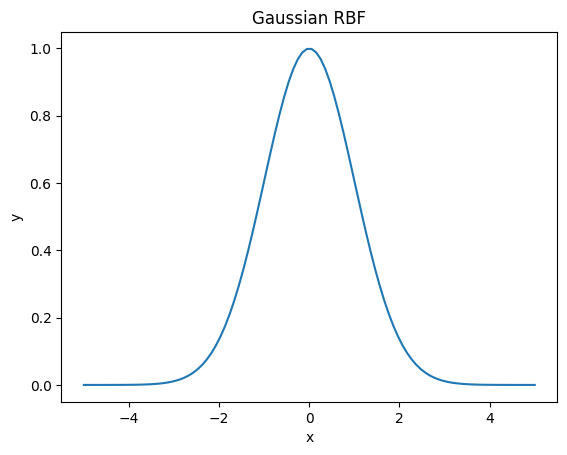

In [15]:
sigma = 1.0  # Параметр масштаба


# Определение Гауссовой функции
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * sigma ** 2))


x = np.linspace(-5, 5, 100)
c = 0  # Центр функции

# Вычисление значений Гауссовой функции
y = [gaussian_rbf(i, c, sigma) for i in x]

# Визуализация функции
plt.plot(x, y)
plt.title('Gaussian RBF')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
data = np.random.rand(100, 2)
data

array([[0.44258447, 0.23928181],
       [0.38773267, 0.97694845],
       [0.3051942 , 0.73650322],
       [0.19932421, 0.51963229],
       [0.48300003, 0.45148019],
       [0.62022792, 0.20242499],
       [0.85800745, 0.43830576],
       [0.83558283, 0.31632974],
       [0.58983551, 0.66459923],
       [0.99044456, 0.8002656 ],
       [0.75168438, 0.65279668],
       [0.52492279, 0.97878456],
       [0.71710169, 0.94363065],
       [0.77091467, 0.80914451],
       [0.46579387, 0.398125  ],
       [0.19134665, 0.48121801],
       [0.34059673, 0.89104621],
       [0.74405908, 0.99835326],
       [0.7465076 , 0.41072056],
       [0.90951068, 0.00266431],
       [0.60446616, 0.13605474],
       [0.56032682, 0.32352803],
       [0.97742886, 0.21413136],
       [0.68711065, 0.97994021],
       [0.73179064, 0.38110954],
       [0.34863091, 0.1314946 ],
       [0.71956048, 0.13023694],
       [0.6444545 , 0.02376673],
       [0.43684006, 0.23889482],
       [0.88402649, 0.84813326],
       [0.

In [8]:
# Реализ|ация сети RBF для кластеризации данных
class RBFNetworkClustering:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, epochs):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.centers = [np.random.uniform(-1, 1, input_dim) for _ in range(hidden_dim)]
        self.width = np.mean(
            [np.linalg.norm(self.centers[i] - self.centers[j]) for i in range(hidden_dim) for j in range(hidden_dim)])

        self.weights = np.random.random((hidden_dim, output_dim))

    def radial_basis_function(self, x, c, width):
        return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * width ** 2))

    def hidden_layer_output(self, X):
        G = np.zeros((X.shape[0], self.hidden_dim), float)
        for i in range(X.shape[0]):
            for j in range(self.hidden_dim):
                G[i, j] = self.radial_basis_function(X[i], self.centers[j], self.width)
        return G

    def train(self, X):
        for epoch in range(self.epochs):
            G = self.hidden_layer_output(X)
            self.weights = np.dot(np.linalg.pinv(G), X)

    def predict(self, X):
        G = self.hidden_layer_output(X)
        return np.dot(G, self.weights)

In [10]:
rbf_network = RBFNetworkClustering(input_dim=2, hidden_dim=5, output_dim=2, learning_rate=0.1, epochs=100)
rbf_network.train(data)

In [11]:
clusters = rbf_network.predict(data)
print("Clusters:", clusters)

Clusters: [[ 0.49680905  0.20599235]
 [ 0.35470497  0.99724375]
 [ 0.30549936  0.74591083]
 [ 0.19693807  0.50624579]
 [ 0.57264414  0.44417935]
 [ 0.62932083  0.18740223]
 [ 0.83291632  0.44820704]
 [ 0.78060912  0.32808399]
 [ 0.68954677  0.69188432]
 [ 0.90998156  0.73688011]
 [ 0.82334553  0.67239376]
 [ 0.54640955  1.00407497]
 [ 0.76058863  0.94567667]
 [ 0.82841637  0.8190108 ]
 [ 0.54870362  0.38224093]
 [ 0.19301734  0.46691349]
 [ 0.31271303  0.91068552]
 [ 0.76510108  0.97795379]
 [ 0.77880462  0.41963982]
 [ 0.62271264  0.06056307]
 [ 0.59126396  0.11774762]
 [ 0.62510219  0.30857239]
 [ 0.75071286  0.24265483]
 [ 0.72359155  0.98131155]
 [ 0.7618093   0.38766042]
 [ 0.38030864  0.09324467]
 [ 0.64972478  0.13235929]
 [ 0.55948429  0.01790075]
 [ 0.49114491  0.20522619]
 [ 0.88060217  0.81657255]
 [-0.01312946  0.7820854 ]
 [ 0.56672904  0.36748342]
 [ 0.65603427  0.11624596]
 [ 0.81696434  0.59775826]
 [ 0.43484532  0.71316593]
 [ 0.54883206  0.10645502]
 [ 0.72886634  0.5

In [22]:
color_clusters = []
for i in clusters:
    if i[0] > i[1]:
        color_clusters.append('blue')
    else:
        color_clusters.append('red')
color_clusters

['blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

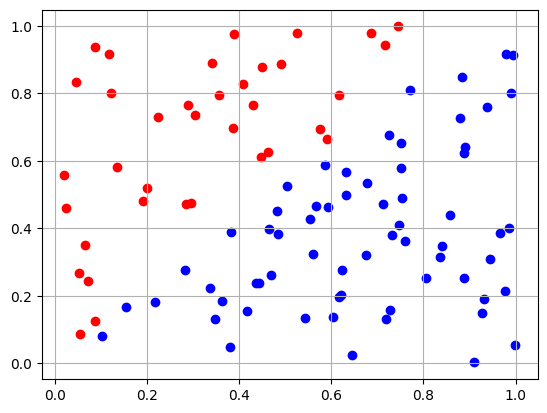

In [32]:
plt.figure()
for i, ii in enumerate(data):
    plt.scatter(x=ii[0], y=ii[1], color=f'{color_clusters[i]}')
plt.grid()
plt.show()